In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
import keras

In [15]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [18]:
x_train = x_train.reshape(x_train.shape[0], 32, 32 , 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
x_test = x_test.astype('float32')
x_train = x_train.astype('float32')


In [19]:
x_train/=255
x_test/=255
n_objects = 10


In [20]:
y_train = np_utils.to_categorical(y_train, n_objects)
y_test = np_utils.to_categorical(y_test, n_objects)

In [21]:
from keras.models import Sequential

In [22]:
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPool2D

In [24]:
model = Sequential()
model.add(Conv2D(50, kernel_size=(3,3), padding= 'same', activation='relu',  input_shape = (32,32,3)))
model.add(Conv2D(75, kernel_size=(3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))


In [26]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [28]:
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 430s 1s/step - loss: 1.5148 - accuracy: 0.4470 - val_loss: 1.1917 - val_accuracy: 0.5712
Epoch 2/10
391/391 [==============================] - 432s 1s/step - loss: 1.1728 - accuracy: 0.5824 - val_loss: 1.0078 - val_accuracy: 0.6406
Epoch 3/10
391/391 [==============================] - 430s 1s/step - loss: 0.9925 - accuracy: 0.6504 - val_loss: 1.0051 - val_accuracy: 0.6526
Epoch 4/10
391/391 [==============================] - 432s 1s/step - loss: 0.8753 - accuracy: 0.6943 - val_loss: 0.8869 - val_accuracy: 0.6881
Epoch 5/10
391/391 [==============================] - 430s 1s/step - loss: 0.7763 - accuracy: 0.7281 - val_loss: 0.9017 - val_accuracy: 0.6872
Epoch 6/10
391/391 [==============================] - 435s 1s/step - loss: 0.6817 - accuracy: 0.7593 - val_loss: 0.8561 - val_accuracy: 0.7095
Epoch 7/10
391/391 [==============================] - 433s 1s/step - loss: 0.6155 - accuracy: 0.7821 - val_loss: 0.8340 - val_accuracy: 0.7162

In [49]:
classes = range(10)
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

class_labels = dict(zip(classes, labels))

batch = x_test[:10]
actual_labels = np.argmax(y_test[:10], axis = -1)
print(y_train[:10])
predictions = model.predict(batch, verbose = 1)
predicted_labels = np.argmax(predictions, axis = -1)

print(actual_labels)
print(predicted_labels)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 60ms/step
[3 8 8 0 6 6 1 6 3 1]
[3 8 8 0 6 6 1 6 3 1]


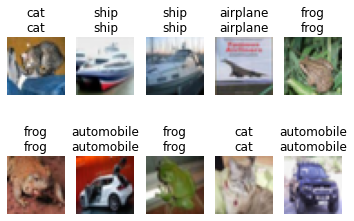

In [50]:
f, ax = plt.subplots(2,5)
for i in range(2):
  for j in range(5):
    ax[i,j].axis('off')
    ax[i,j].set_title(f'{labels[actual_labels[5*i+j]]}\n{labels[predicted_labels[5*i+j]]}')
    ax[i,j].imshow(x_test[5*i+j])

